#AG1 - Actividad Guiada 1
Nombre: Hugo Fernandez Amaro<br>
Link:   https://colab.research.google.com/drive/1MN8oqWnsCI6NLjKhteZ5B8ePRJ18qLks?usp=sharing <br>
Github: https://github.com/Hfa96/03MIAR_Algoritmos_de_Optimizacion
<br>


# **Torres de Hanoi - Divide y venceras**

In [ ]:
def Torres_Hanoi(N, desde, hasta):
  #N - Nº de fichas
  #desde - torre inicial
  #hasta - torre finaL
  if N==1 :
    print("Lleva la ficha desde " + str(desde) + " hasta " + str(hasta))

  else:
    Torres_Hanoi(N-1, desde, 6-desde-hasta)
    print("Lleva la ficha desde " + str(desde) + " hasta " + str(hasta))
    Torres_Hanoi(N-1, 6-desde-hasta,  hasta)

Torres_Hanoi(3, 1, 3)


Lleva la ficha desde 1 hasta 3
Lleva la ficha desde 1 hasta 2
Lleva la ficha desde 3 hasta 2
Lleva la ficha desde 1 hasta 3
Lleva la ficha desde 2 hasta 1
Lleva la ficha desde 2 hasta 3
Lleva la ficha desde 1 hasta 3


# **Cambio de monedas - Técnica voraz**

In [ ]:

SISTEMA = [12, 5 ,2, 1  ]

def cambio_monedas(CANTIDAD,SISTEMA):
#variables:
# cantidad a cambiar
# sistema: valor de las monedas diferente, ordenado de mayor valor a menor

  SOLUCION = [0]*len(SISTEMA)
  ValorAcumulado = 0

  for i,valor in enumerate(SISTEMA):
    monedas = (CANTIDAD-ValorAcumulado)//valor
    SOLUCION[i] = monedas
    ValorAcumulado = ValorAcumulado + monedas*valor

    if CANTIDAD == ValorAcumulado:
      return SOLUCION

  print("No es posible encontrar solucion") 
cambio_monedas(15,SISTEMA)

[1, 0, 1, 1]

## Otra propuesta de solución

In [ ]:
def cambio_monedas(cantidad, sistema):
# cantidad a cambiar
# sistema: valor de las monedas diferente, ordenado de mayor valor a menor

  solucion = {}

  for v in sistema:

    monedas = cantidad // v
    solucion[v] = monedas
    cantidad -= monedas * v

    if cantidad == 0:

      return solucion

# **N Reinas - Vuelta Atrás**

In [ ]:
#Verifica que en la solución parcial no hay amenzas entre reinas

def es_prometedora(SOLUCION,etapa):

  #Si la solución tiene dos valores iguales no es valida => Dos reinas en la misma fila
  for i in range(etapa+1):
    #print("El valor " + str(SOLUCION[i]) + " está " +  str(SOLUCION.count(SOLUCION[i])) + " veces")
    if SOLUCION.count(SOLUCION[i]) > 1:       
      return False
  
    #Verifica las diagonales
    for j in range(i+1, etapa +1 ):
      #print("Comprobando diagonal de " + str(i) + " y " + str(j))
      if abs(i-j) == abs(SOLUCION[i]-SOLUCION[j]) : return False
  return True

#Traduce la solución al tablero
def escribe_solucion(S):
  n = len(S)
  for x in range(n):
    print("")
    for i in range(n):
      if S[i] == x+1:
        print(" Q " , end="")
      else:
        print(" - ", end="")

#Proceso principal de N-Reinas

def reinas(N, solucion=[],etapa=0): 

  if len(solucion) == 0:         # [0,0,0...]
    solucion = [0 for i in range(N) ]
  
  for i in range(1, N+1):
    solucion[etapa] = i
    if es_prometedora(solucion, etapa):
      if etapa == N-1:
        print(solucion)
      else:  
        reinas(N, solucion, etapa+1)
    else:
      None
  
  solucion[etapa] = 0

reinas(4,solucion=[],etapa=0)

[2, 4, 1, 3]
[3, 1, 4, 2]


In [ ]:
escribe_solucion([3, 1, 4, 2])


 -  Q  -  - 
 -  -  -  Q 
 Q  -  -  - 
 -  -  Q  - 

# **Viaje por el rio - Programación dinámica**

In [ ]:
TARIFAS = [
[0,5,4,3,999,999,999],
[999,0,999,2,3,999,11],
[999,999, 0,1,999,4,10],
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf")

#Calculo de la matriz de PRECIOS y RUTAS
def Precios(TARIFAS):
  #Total de Nodos
  N = len(TARIFAS[0])
  
  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]
  RUTA = [ [""]*N for i in [""]*N]
  
  for i in range(0,N-1):
    RUTA[i][i] = i             #Para ir de i a i se "pasa por i"
    PRECIOS[i][i] = 0          #Para ir de i a i se se paga 0
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i         
      
      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k          #Anota que para ir de i a j hay que pasar por k
        PRECIOS[i][j] = MIN
        
  return PRECIOS,RUTA

#Determinar la ruta con Recursividad
def calcular_ruta(RUTA, desde, hasta):
  if desde == hasta:
    #print("Ir a :" + str(desde))
    return "" 
  else:
    return str(calcular_ruta( RUTA, desde, RUTA[desde][hasta])) +  \
                ',' + \
                str(RUTA[desde][hasta] \
              ) 

PRECIOS,RUTA = Precios(TARIFAS)  
print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])
print("\nRUTA")  
for i in range(len(TARIFAS)):
  print(RUTA[i])  
  
print("\nLa ruta es:")  
calcular_ruta(RUTA, 0,6)  

PRECIOS
[0, 5, 4, 3, 8, 8, 11]
[9999, 0, 999, 2, 3, 8, 7]
[9999, 9999, 0, 1, 6, 4, 7]
[9999, 9999, 9999, 0, 5, 6, 9]
[9999, 9999, 9999, 9999, 0, 999, 4]
[9999, 9999, 9999, 9999, 9999, 0, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
[0, 0, 0, 0, 1, 2, 5]
['', 1, 1, 1, 1, 3, 4]
['', '', 2, 2, 3, 2, 5]
['', '', '', 3, 3, 3, 3]
['', '', '', '', 4, 4, 4]
['', '', '', '', '', 5, 5]
['', '', '', '', '', '', '']

La ruta es:


',0,2,5'

## **Practica individual**
• Problema: Encontrar los dos puntos más cercanos

### **Fuerza bruta:**

### **1D**

In [ ]:
def min_distance_1D(lista):
    
    min_dist = float("inf")
    for i in range(len(lista)):
        for j in lista[i+1:]:
            dist = abs(lista[i]-(j))
            if dist < min_dist:
                min_dist = dist
                puntoA = lista[i]
                puntoB = j
    return puntoA, puntoB

In [ ]:
import random
lista_1D = [random.randrange(1, 10000) for x in range(20)]
print(lista_1D)
print(min_distance_1D(lista_1D))

[2042, 7925, 2404, 4269, 9645, 7978, 9415, 3374, 4389, 7544, 975, 2390, 7629, 5324, 4301, 1574, 1196, 5645, 5265, 3097]
(2404, 2390)


In [ ]:
import math

def min_distance_2D(lista):
    
    min_dist = float("inf")
    for i in range(len(lista)):
        for j in lista[i+1:]:
            dist = math.sqrt((j[0] - lista[i][0])**2 + (j[1] - lista[i][1])**2)
            if dist < min_dist:
                min_dist = dist
                puntoA = lista[i]
                puntoB = j
    return puntoA, puntoB

In [ ]:
import random
lista_2D = [(random.randrange(1, 10000), random.randrange(1, 10000)) for x in range(10)]
print(lista_2D)
print(min_distance_2D(lista_2D))

[(9704, 3178), (4411, 4868), (7995, 197), (3530, 5642), (4906, 9400), (8476, 9186), (6874, 7472), (4307, 8360), (4495, 6602), (1703, 3112)]
((3530, 5642), (4411, 4868))


In [ ]:
def min_distance_3D(lista):
    
    min_dist = float("inf")
    for i in range(len(lista)):
        for j in lista[i+1:]:
            dist = math.sqrt((j[0] - lista[i][0])**2 + (j[1] - lista[i][1])**2 + (j[2] - lista[i][2])**2)
            if dist < min_dist:
                min_dist = dist
                puntoA = lista[i]
                puntoB = j
    return puntoA, puntoB

In [ ]:
import random

lista_3D = [(random.randrange(1, 1000), random.randrange(1, 100), random.randrange(1, 100)) for x in range(10)]
print(lista_3D)
print(min_distance_3D(lista_3D))

[(535, 41, 87), (159, 86, 62), (316, 70, 2), (707, 82, 97), (400, 86, 56), (151, 5, 4), (240, 39, 4), (597, 7, 38), (610, 8, 89), (26, 48, 44)]
((597, 7, 38), (610, 8, 89))


- Calcular la complejidad. ¿Se puede mejorar?

la complejidad es de O(n^2), doble bucle for

si ordenamos la lista podemos usar un único bucle for, obteniendo complejidad O(n)

In [ ]:
# ORDENANDO LA LISTA NO NECESITAMOS HACER 2 BUCLES FOR
lista = [2, 40, 38, 5, 79, 6]

def min_distance(lista):
    lista.sort()
    min_dist = float("inf")
    print(lista)
    for i in range(len(lista)-1):
        dist = abs(lista[i]-lista[i+1])
        if dist < min_dist:
            min_dist = dist
            puntoA = lista[i]
            puntoB = lista[i+1]
    return puntoA, puntoB

min_distance(lista)

[2, 5, 6, 38, 40, 79]


(5, 6)

In [ ]:
import random
lista_1D = [random.randrange(1, 10000) for x in range(20)]
print(lista_1D)
print(min_distance_1D(lista_1D))
print(min_distance(lista_1D))

[1753, 5776, 5102, 2192, 5717, 8878, 233, 1520, 2991, 8385, 3954, 5791, 383, 6100, 4252, 8683, 7462, 5154, 4303, 7677]
(5776, 5791)
[233, 383, 1520, 1753, 2192, 2991, 3954, 4252, 4303, 5102, 5154, 5717, 5776, 5791, 6100, 7462, 7677, 8385, 8683, 8878]
(5776, 5791)


### Divide y Vencerás

## Funciones de Cálculo de distancias

In [ ]:
def distance_1D(A,B):

  return abs(A - B)

def distance_2D(A,B):

  return math.sqrt((B[0] - A[0])**2 + (B[1] - A[1])**2)

def distance_3D(A,B):

  return math.sqrt((B[0] - A[0])**2 + (B[1] - A[1])**2 + (B[2] - A[2])**2)

## Algoritmo Divide Y Vencerás 1D

In [ ]:
import math

def divide_y_venceras_conquer(lst):
   lst.sort() #ordenamos la lista
   min_distance = float('inf')
   n = len(lst)
   if n < 2: # caso base, si no hay suficientes elementos
        return 0, float("inf")
   if n == 2: # caso base, si solo hay dos elementos
        return lst[0], lst[1]

   else:
      mid = n // 2
      left_list = lst[:mid]
      right_list = lst[mid:]

      pointA, pointB = divide_y_venceras_conquer(left_list) # recursividad division izquierda
      dist = distance_1D(pointA, pointB)  #1D


      if min_distance > dist:
        min_distance = dist
        point_1, point_2 = pointA, pointB
      
      pointC, pointD = divide_y_venceras_conquer(right_list) #recursividad division derecha
      dist = distance_1D(pointC, pointD) #1D


      if min_distance > dist:
        min_distance = dist
        point_1, point_2 = pointC, pointD

      pointE, pointF = lst[mid -1], lst[mid] #comparación distancia puntos medios
      dist = distance_1D(pointE, pointF) #1D


      if min_distance > dist:
        min_distance = dist
        point_1, point_2 = pointE, pointF

      return point_1, point_2

## Algoritmo Divide y Vencerás 2D

In [ ]:
import math
import numpy as np

def closest_pair_2D(lst):
    if len(lst) <= 3:
        return min([(distance_2D(lst[i], lst[j]), lst[i], lst[j]) for i in range(len(lst)) for j in range(i+1, len(lst))], key=lambda x: x[0])[1:]
    mid = len(lst)//2
    left_list = lst[:mid]
    right_list = lst[mid:]
    dL = closest_pair_2D(left_list)
    dR = closest_pair_2D(right_list)
    position = min(dL, dR, key=lambda x: distance_2D(x[0], x[1]))
    strip = [p for p in lst if abs(p[0] - lst[mid][0]) < distance_2D(position[0], position[1])]
    strip.sort(key=lambda x: x[1])
    m = len(strip)
    for i in range(m):
        for j in range(i+1, min(i + 7, m)):
            if strip[j][1] - strip[i][1] >= distance_2D(position[0], position[1]):
                break
            position = min(position, (strip[i], strip[j]), key=lambda x: distance_2D(x[0], x[1]))
    return position


## Algoritmo Divide y Vencerás 3D

In [ ]:
import math
import numpy as np


def closest_pair_3D(lst):
    if len(lst) <= 3:
        return min([(distance_3D(lst[i], lst[j]), lst[i], lst[j]) for i in range(len(lst)) for j in range(i+1, len(lst))], key=lambda x: x[0])[1:]
    mid = len(lst)//2
    left_list = lst[:mid]
    right_list = lst[mid:]
    dL = closest_pair_3D(left_list)
    dR = closest_pair_3D(right_list)
    position = min(dL, dR, key=lambda x: distance_3D(x[0], x[1]))
    strip = [p for p in lst if abs(p[0] - lst[mid][0]) < distance_3D(position[0], position[1])]
    strip.sort(key=lambda x: x[1])
    m = len(strip)
    for i in range(m):
        for j in range(i+1, min(i + 7, m)):
            if strip[j][1] - strip[i][1] >= distance_3D(position[0], position[1]):
                break
            position = min(position, (strip[i], strip[j]), key=lambda x: distance_3D(x[0], x[1]))
    return position

## Banco de pruebas

In [ ]:
import random
lista_1D = [random.randrange(1, 10000) for x in range(15)]
lista_2D = [(random.randrange(1, 10000), random.randrange(1, 10000)) for x in range(5)]
lista_3D = [(random.randrange(1, 10000), random.randrange(1, 10000), random.randrange(1, 10000)) for x in range(5)]

#1D
print(divide_y_venceras_conquer(lista_1D))
print(min_distance_1D(lista_1D))

#2D
print(closest_pair_2D(lista_2D))
print(min_distance_2D(lista_2D))

#3D
print(closest_pair_3D(lista_3D))
print(min_distance_3D(lista_3D))

(1531, 1588)
(1531, 1588)
((1376, 9402), (3317, 9508))
((1376, 9402), (3317, 9508))
((3658, 6205, 3229), (3716, 4984, 4659))
((3658, 6205, 3229), (3716, 4984, 4659))


- Calcular la complejidad. ¿Se puede mejorar?

la complejidad es de O(nlog(n)) 

El algoritmo de Divide y Vencerás se caracteriza por dividir un problema grande en subproblemas más pequeños, resolver cada subproblema de forma independiente y combinar los resultados para obtener la solución del problema original. La complejidad temporal de este algoritmo es O(n log n) debido a que la división de los problemas en subproblemas se realiza en tiempos logarítmicos y la resolución de cada subproblema requiere un tiempo lineal. Esto se traduce en una complejidad total de O(n log n), que es una complejidad eficiente para muchos problemas.

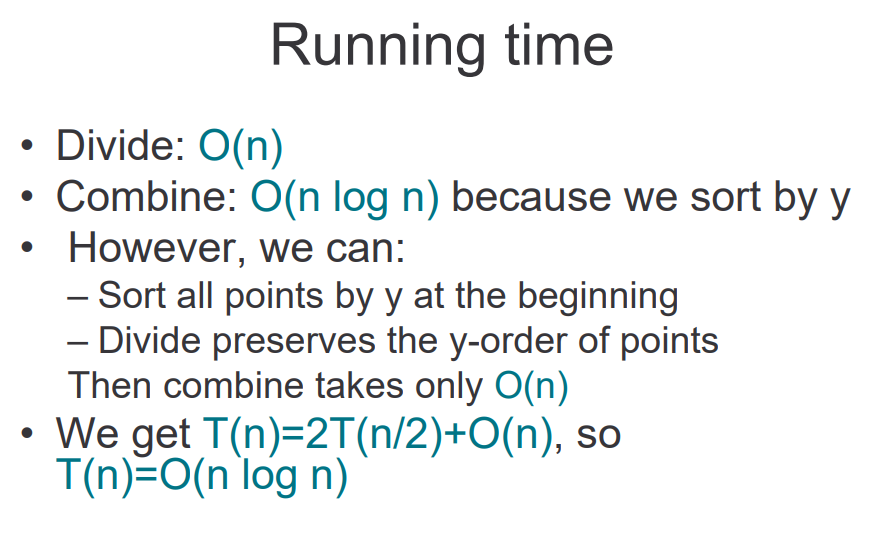

